In [2]:
   from google.colab import drive

   drive.mount('/content/drive')

Mounted at /content/drive


# Varying Epochs from 10 to 70

Epoch 1/10
48/48 [==============================] - 1s 6ms/step - loss: 5.0023e-04 - val_loss: 3.1730e-04
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 2.4726e-04 - val_loss: 3.0126e-04
Epoch 3/10
48/48 [==============================] - 0s 4ms/step - loss: 2.3655e-04 - val_loss: 2.9759e-04
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2996e-04 - val_loss: 2.9361e-04
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2622e-04 - val_loss: 2.9443e-04
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2792e-04 - val_loss: 3.1484e-04
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2636e-04 - val_loss: 3.0440e-04
Epoch 8/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2533e-04 - val_loss: 2.9106e-04
Epoch 9/10
48/48 [==============================] - 0s 4ms/step - loss: 2.2672e-04 - val_loss: 2.9722e-04
Epoch 10/10
12/12 [===========================

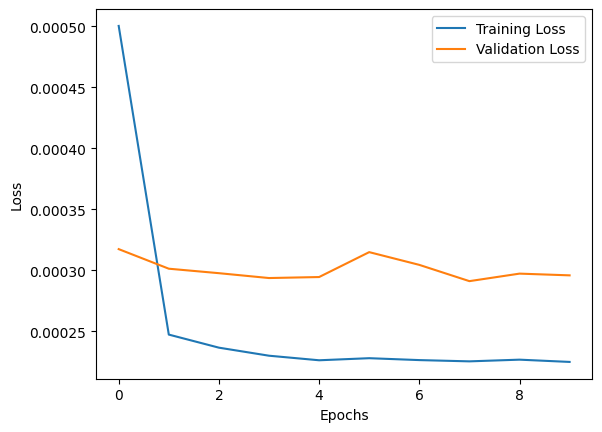

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
48/48 [==============================] - 2s 10ms/step - loss: 5.7380e-04 - val_loss: 3.5495e-04
Epoch 2/20
48/48 [==============================] - 0s 6ms/step - loss: 3.0394e-04 - val_loss: 3.1955e-04
Epoch 3/20
48/48 [==============================] - 0s 6ms/step - loss: 2.6774e-04 - val_loss: 2.8670e-04
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 2.4810e-04 - val_loss: 2.6499e-04
Epoch 5/20
48/48 [==============================] - 0s 6ms/step - loss: 2.3963e-04 - val_loss: 2.7629e-04
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 2.3750e-04 - val_loss: 2.6589e-04
Epoch 7/20
48/48 [==============================] - 0s 6ms/step - loss: 2.3874e-04 - val_loss: 2.6260e-04
Epoch 8/20
48/48 [==============================] - 0s 5ms/step - loss: 2.3700e-04 - val_loss: 2.6147e-04
Epoch 9/20
48/48 [==============================] - 0s 5ms/step - loss: 2.3548e-04 - val_loss: 2.6419e-04
Epoch 10/20
48/48 [==========================

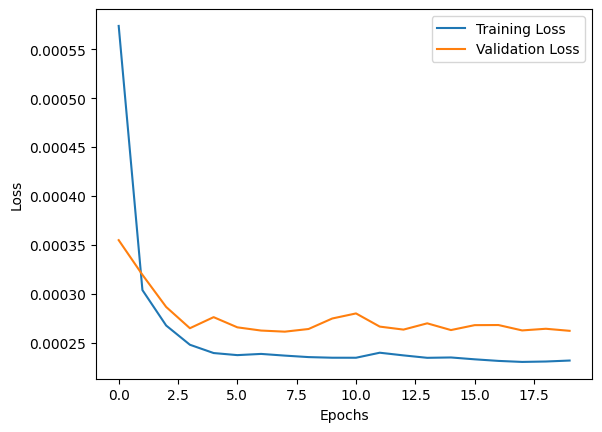

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1355)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 1s 10ms/step - loss: 3.2823e-04 - val_loss: 2.7867e-04
Epoch 2/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4563e-04 - val_loss: 2.8018e-04
Epoch 3/30
48/48 [==============================] - 0s 5ms/step - loss: 2.4289e-04 - val_loss: 2.7126e-04
Epoch 4/30
48/48 [==============================] - 0s 7ms/step - loss: 2.4640e-04 - val_loss: 2.6386e-04
Epoch 5/30
48/48 [==============================] - 0s 6ms/step - loss: 2.3966e-04 - val_loss: 2.6966e-04
Epoch 6/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4062e-04 - val_loss: 2.4601e-04
Epoch 7/30
48/48 [==============================] - 0s 7ms/step - loss: 2.3702e-04 - val_loss: 2.5199e-04
Epoch 8/30
48/48 [==============================] - 0s 6ms/step - loss: 2.3848e-04 - val_loss: 2.5461e-04
Epoch 9/30
48/48 [==============================] - 0s 6ms/step - loss: 2.3818e-04 - val_loss: 2.4876e-04
Epoch 10/30
48/48 [==========================

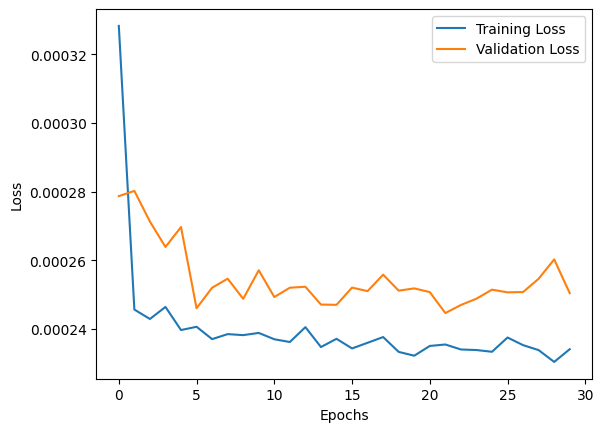

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=103)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/40
48/48 [==============================] - 2s 15ms/step - loss: 3.7785e-04 - val_loss: 2.3091e-04
Epoch 2/40
48/48 [==============================] - 0s 10ms/step - loss: 2.5426e-04 - val_loss: 2.2863e-04
Epoch 3/40
48/48 [==============================] - 0s 9ms/step - loss: 2.4990e-04 - val_loss: 2.3002e-04
Epoch 4/40
48/48 [==============================] - 0s 8ms/step - loss: 2.4666e-04 - val_loss: 2.3353e-04
Epoch 5/40
48/48 [==============================] - 0s 6ms/step - loss: 2.4941e-04 - val_loss: 2.3363e-04
Epoch 6/40
48/48 [==============================] - 0s 7ms/step - loss: 2.4324e-04 - val_loss: 2.2424e-04
Epoch 7/40
48/48 [==============================] - 0s 7ms/step - loss: 2.4502e-04 - val_loss: 2.3614e-04
Epoch 8/40
48/48 [==============================] - 0s 6ms/step - loss: 2.4901e-04 - val_loss: 2.2777e-04
Epoch 9/40
48/48 [==============================] - 0s 6ms/step - loss: 2.4166e-04 - val_loss: 2.3321e-04
Epoch 10/40
48/48 [=========================

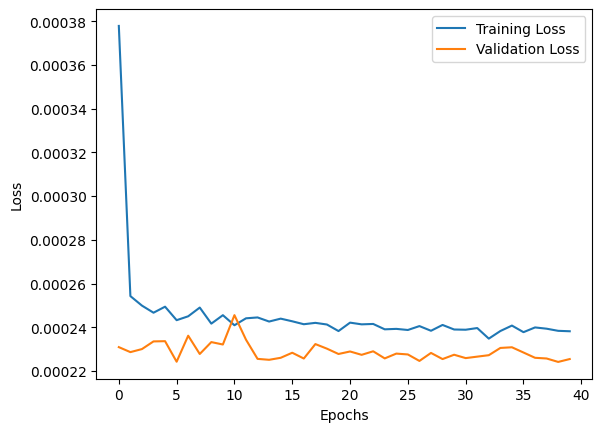

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
48/48 [==============================] - 1s 11ms/step - loss: 3.4296e-04 - val_loss: 2.2591e-04
Epoch 2/50
48/48 [==============================] - 0s 7ms/step - loss: 2.6507e-04 - val_loss: 2.0534e-04
Epoch 3/50
48/48 [==============================] - 1s 14ms/step - loss: 2.4933e-04 - val_loss: 2.1044e-04
Epoch 4/50
48/48 [==============================] - 0s 5ms/step - loss: 2.5139e-04 - val_loss: 2.2152e-04
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 2.4904e-04 - val_loss: 2.2087e-04
Epoch 6/50
48/48 [==============================] - 0s 5ms/step - loss: 2.5273e-04 - val_loss: 2.1983e-04
Epoch 7/50
48/48 [==============================] - 0s 5ms/step - loss: 2.4805e-04 - val_loss: 2.1277e-04
Epoch 8/50
48/48 [==============================] - 0s 5ms/step - loss: 2.5247e-04 - val_loss: 2.0473e-04
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 2.4784e-04 - val_loss: 2.2134e-04
Epoch 10/50
48/48 [=========================

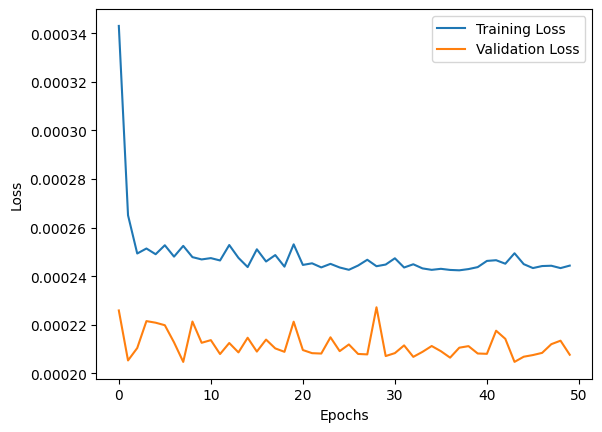

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1057)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/60
48/48 [==============================] - 2s 16ms/step - loss: 4.5326e-04 - val_loss: 1.9882e-04
Epoch 2/60
48/48 [==============================] - 0s 10ms/step - loss: 2.6956e-04 - val_loss: 1.7858e-04
Epoch 3/60
48/48 [==============================] - 0s 10ms/step - loss: 2.6450e-04 - val_loss: 1.7379e-04
Epoch 4/60
48/48 [==============================] - 0s 10ms/step - loss: 2.6774e-04 - val_loss: 1.8155e-04
Epoch 5/60
48/48 [==============================] - 0s 10ms/step - loss: 2.6939e-04 - val_loss: 1.7365e-04
Epoch 6/60
48/48 [==============================] - 0s 10ms/step - loss: 2.5887e-04 - val_loss: 1.6885e-04
Epoch 7/60
48/48 [==============================] - 0s 9ms/step - loss: 2.5925e-04 - val_loss: 1.7904e-04
Epoch 8/60
48/48 [==============================] - 0s 10ms/step - loss: 2.6314e-04 - val_loss: 1.8444e-04
Epoch 9/60
48/48 [==============================] - 0s 10ms/step - loss: 2.6326e-04 - val_loss: 1.6709e-04
Epoch 10/60
48/48 [===================

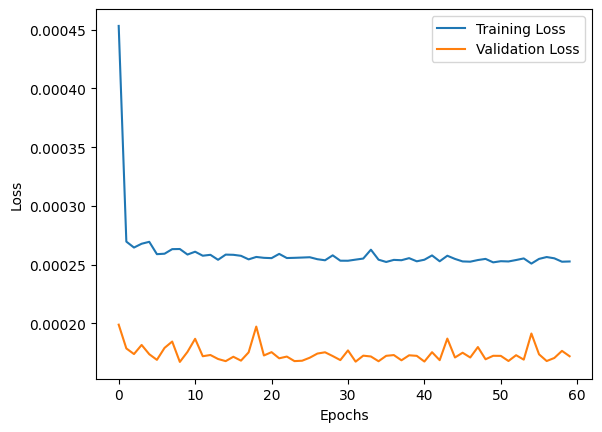

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/70
48/48 [==============================] - 2s 17ms/step - loss: 3.7915e-04 - val_loss: 1.7558e-04
Epoch 2/70
48/48 [==============================] - 0s 8ms/step - loss: 2.7414e-04 - val_loss: 1.6833e-04
Epoch 3/70
48/48 [==============================] - 0s 5ms/step - loss: 2.6812e-04 - val_loss: 1.7161e-04
Epoch 4/70
48/48 [==============================] - 0s 9ms/step - loss: 2.6651e-04 - val_loss: 1.6468e-04
Epoch 5/70
48/48 [==============================] - 0s 8ms/step - loss: 2.6805e-04 - val_loss: 1.6101e-04
Epoch 6/70
48/48 [==============================] - 0s 6ms/step - loss: 2.5985e-04 - val_loss: 1.6993e-04
Epoch 7/70
48/48 [==============================] - 0s 8ms/step - loss: 2.6447e-04 - val_loss: 1.6027e-04
Epoch 8/70
48/48 [==============================] - 0s 7ms/step - loss: 2.6119e-04 - val_loss: 1.6379e-04
Epoch 9/70
48/48 [==============================] - 0s 7ms/step - loss: 2.6292e-04 - val_loss: 1.6251e-04
Epoch 10/70
48/48 [==========================

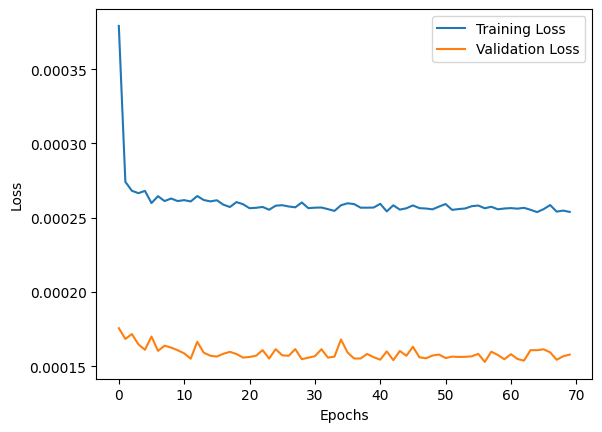

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1071)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Varying Sequence lengths

Epoch 1/30
49/49 [==============================] - 2s 7ms/step - loss: 3.0671e-04 - val_loss: 3.5687e-04
Epoch 2/30
49/49 [==============================] - 0s 3ms/step - loss: 2.2361e-04 - val_loss: 3.3585e-04
Epoch 3/30
49/49 [==============================] - 0s 3ms/step - loss: 2.2174e-04 - val_loss: 3.5855e-04
Epoch 4/30
49/49 [==============================] - 0s 3ms/step - loss: 2.1635e-04 - val_loss: 3.4583e-04
Epoch 5/30
49/49 [==============================] - 0s 3ms/step - loss: 2.1710e-04 - val_loss: 3.3748e-04
Epoch 6/30
49/49 [==============================] - 0s 3ms/step - loss: 2.1932e-04 - val_loss: 3.4191e-04
Epoch 7/30
49/49 [==============================] - 0s 3ms/step - loss: 2.1697e-04 - val_loss: 3.6023e-04
Epoch 8/30
49/49 [==============================] - 0s 3ms/step - loss: 2.2318e-04 - val_loss: 3.3552e-04
Epoch 9/30
49/49 [==============================] - 0s 3ms/step - loss: 2.1660e-04 - val_loss: 3.3588e-04
Epoch 10/30
49/49 [===========================

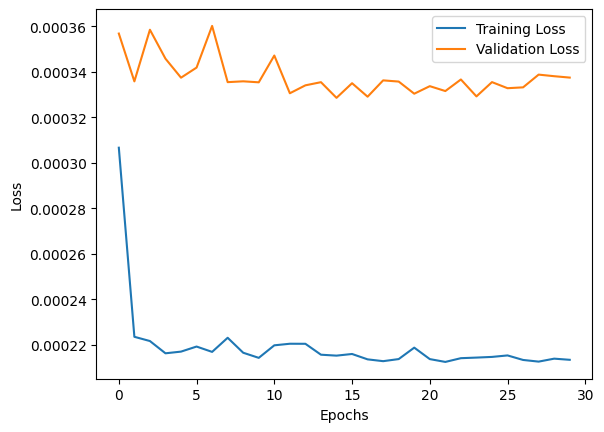

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 10  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2011)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 2s 12ms/step - loss: 3.5941e-04 - val_loss: 2.4762e-04
Epoch 2/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4630e-04 - val_loss: 2.5260e-04
Epoch 3/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4096e-04 - val_loss: 2.5056e-04
Epoch 4/30
48/48 [==============================] - 0s 7ms/step - loss: 2.4462e-04 - val_loss: 2.5276e-04
Epoch 5/30
48/48 [==============================] - 0s 5ms/step - loss: 2.3914e-04 - val_loss: 2.5609e-04
Epoch 6/30
48/48 [==============================] - 0s 3ms/step - loss: 2.4374e-04 - val_loss: 2.4351e-04
Epoch 7/30
48/48 [==============================] - 0s 4ms/step - loss: 2.4332e-04 - val_loss: 2.4833e-04
Epoch 8/30
48/48 [==============================] - 0s 3ms/step - loss: 2.4170e-04 - val_loss: 2.5703e-04
Epoch 9/30
48/48 [==============================] - 0s 3ms/step - loss: 2.4063e-04 - val_loss: 2.4281e-04
Epoch 10/30
48/48 [==========================

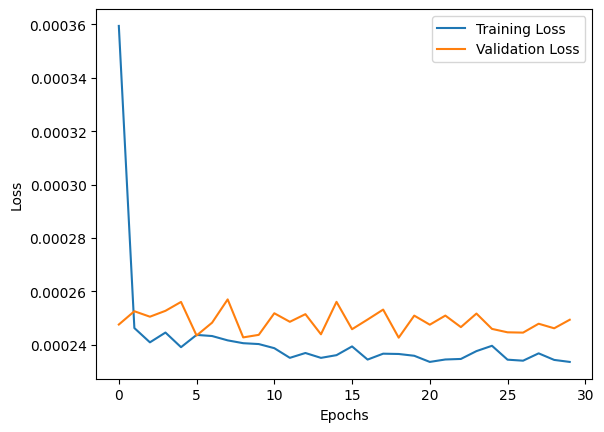

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2028)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 2s 12ms/step - loss: 3.9267e-04 - val_loss: 2.5750e-04
Epoch 2/30
48/48 [==============================] - 0s 7ms/step - loss: 2.4966e-04 - val_loss: 2.7194e-04
Epoch 3/30
48/48 [==============================] - 0s 9ms/step - loss: 2.4424e-04 - val_loss: 2.5455e-04
Epoch 4/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4290e-04 - val_loss: 2.5644e-04
Epoch 5/30
48/48 [==============================] - 0s 5ms/step - loss: 2.4341e-04 - val_loss: 2.5549e-04
Epoch 6/30
48/48 [==============================] - 0s 5ms/step - loss: 2.3658e-04 - val_loss: 2.5161e-04
Epoch 7/30
48/48 [==============================] - 0s 5ms/step - loss: 2.3762e-04 - val_loss: 2.5436e-04
Epoch 8/30
48/48 [==============================] - 0s 5ms/step - loss: 2.3445e-04 - val_loss: 2.5288e-04
Epoch 9/30
48/48 [==============================] - 0s 5ms/step - loss: 2.3281e-04 - val_loss: 2.5013e-04
Epoch 10/30
48/48 [==========================

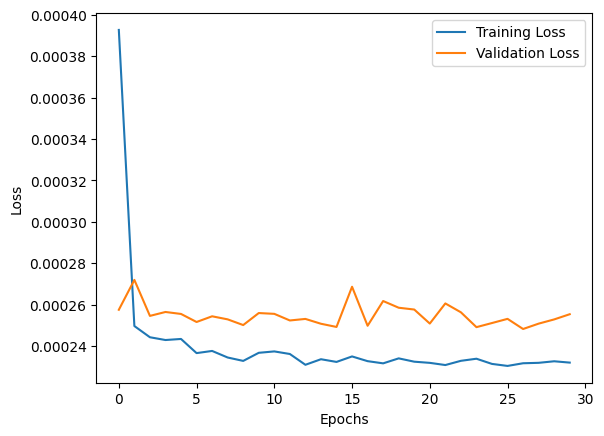

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 30  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2036)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 2s 19ms/step - loss: 3.8387e-04 - val_loss: 2.4506e-04
Epoch 2/30
48/48 [==============================] - 1s 14ms/step - loss: 2.6326e-04 - val_loss: 2.4626e-04
Epoch 3/30
48/48 [==============================] - 1s 13ms/step - loss: 2.6198e-04 - val_loss: 2.3422e-04
Epoch 4/30
48/48 [==============================] - 0s 10ms/step - loss: 2.4650e-04 - val_loss: 2.3566e-04
Epoch 5/30
48/48 [==============================] - 0s 9ms/step - loss: 2.4454e-04 - val_loss: 2.3132e-04
Epoch 6/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4144e-04 - val_loss: 2.3124e-04
Epoch 7/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4088e-04 - val_loss: 2.4053e-04
Epoch 8/30
48/48 [==============================] - 0s 7ms/step - loss: 2.4599e-04 - val_loss: 2.3762e-04
Epoch 9/30
48/48 [==============================] - 0s 7ms/step - loss: 2.5246e-04 - val_loss: 2.3631e-04
Epoch 10/30
48/48 [=======================

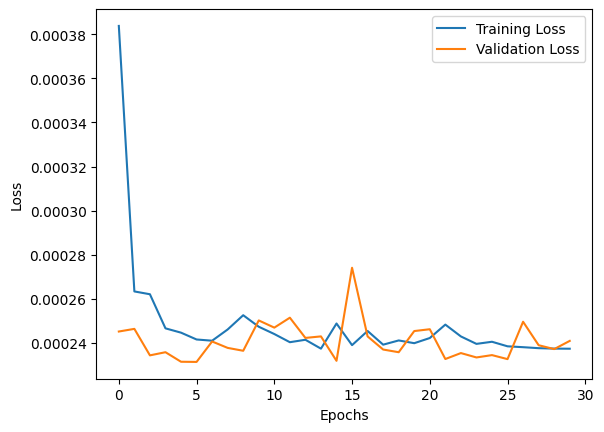

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 40  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2041)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 2s 15ms/step - loss: 4.7848e-04 - val_loss: 2.4457e-04
Epoch 2/30
48/48 [==============================] - 0s 9ms/step - loss: 2.5853e-04 - val_loss: 2.3564e-04
Epoch 3/30
48/48 [==============================] - 0s 6ms/step - loss: 2.5031e-04 - val_loss: 2.3381e-04
Epoch 4/30
48/48 [==============================] - 0s 6ms/step - loss: 2.4875e-04 - val_loss: 2.3560e-04
Epoch 5/30
48/48 [==============================] - 0s 7ms/step - loss: 2.4752e-04 - val_loss: 2.2788e-04
Epoch 6/30
48/48 [==============================] - 0s 6ms/step - loss: 2.5168e-04 - val_loss: 2.7028e-04
Epoch 7/30
48/48 [==============================] - 0s 6ms/step - loss: 2.5062e-04 - val_loss: 2.2668e-04
Epoch 8/30
48/48 [==============================] - 0s 6ms/step - loss: 2.5206e-04 - val_loss: 2.9500e-04
Epoch 9/30
48/48 [==============================] - 0s 6ms/step - loss: 2.6170e-04 - val_loss: 2.2488e-04
Epoch 10/30
48/48 [==========================

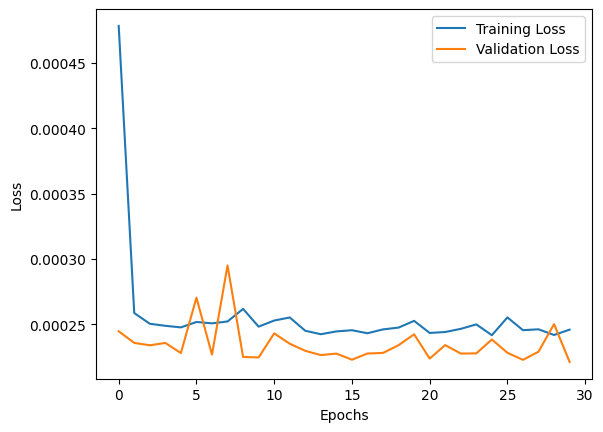

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 50  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2056)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
47/47 [==============================] - 9s 38ms/step - loss: 6.1038e-04 - val_loss: 2.8113e-04
Epoch 2/30
47/47 [==============================] - 1s 29ms/step - loss: 2.9441e-04 - val_loss: 2.3926e-04
Epoch 3/30
47/47 [==============================] - 1s 24ms/step - loss: 2.5949e-04 - val_loss: 2.2764e-04
Epoch 4/30
47/47 [==============================] - 1s 22ms/step - loss: 2.5249e-04 - val_loss: 2.3260e-04
Epoch 5/30
47/47 [==============================] - 1s 24ms/step - loss: 2.5507e-04 - val_loss: 2.4212e-04
Epoch 6/30
47/47 [==============================] - 1s 13ms/step - loss: 2.5272e-04 - val_loss: 2.2564e-04
Epoch 7/30
47/47 [==============================] - 1s 13ms/step - loss: 2.4568e-04 - val_loss: 2.2442e-04
Epoch 8/30
47/47 [==============================] - 1s 14ms/step - loss: 2.4779e-04 - val_loss: 2.2566e-04
Epoch 9/30
47/47 [==============================] - 1s 20ms/step - loss: 2.4450e-04 - val_loss: 2.3009e-04
Epoch 10/30
47/47 [==================

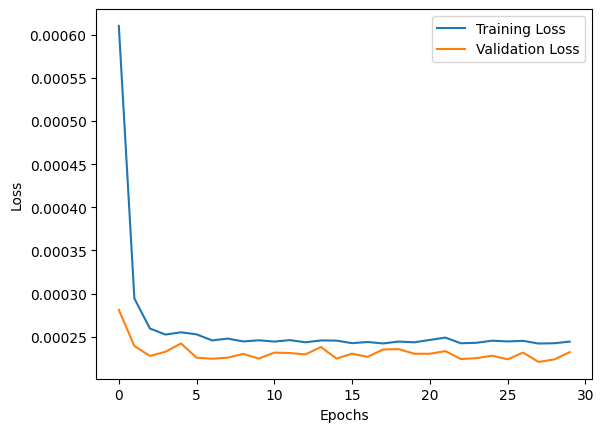

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 60  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2061)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
47/47 [==============================] - 3s 20ms/step - loss: 0.0010 - val_loss: 3.5838e-04
Epoch 2/30
47/47 [==============================] - 1s 14ms/step - loss: 3.1667e-04 - val_loss: 2.8286e-04
Epoch 3/30
47/47 [==============================] - 1s 22ms/step - loss: 2.7464e-04 - val_loss: 2.6464e-04
Epoch 4/30
47/47 [==============================] - 1s 14ms/step - loss: 2.5739e-04 - val_loss: 2.5668e-04
Epoch 5/30
47/47 [==============================] - 1s 19ms/step - loss: 2.4987e-04 - val_loss: 2.5869e-04
Epoch 6/30
47/47 [==============================] - 1s 24ms/step - loss: 2.4667e-04 - val_loss: 2.5547e-04
Epoch 7/30
47/47 [==============================] - 1s 24ms/step - loss: 2.4121e-04 - val_loss: 2.5356e-04
Epoch 8/30
47/47 [==============================] - 2s 32ms/step - loss: 2.4146e-04 - val_loss: 2.6247e-04
Epoch 9/30
47/47 [==============================] - 1s 26ms/step - loss: 2.3596e-04 - val_loss: 2.5715e-04
Epoch 10/30
47/47 [======================

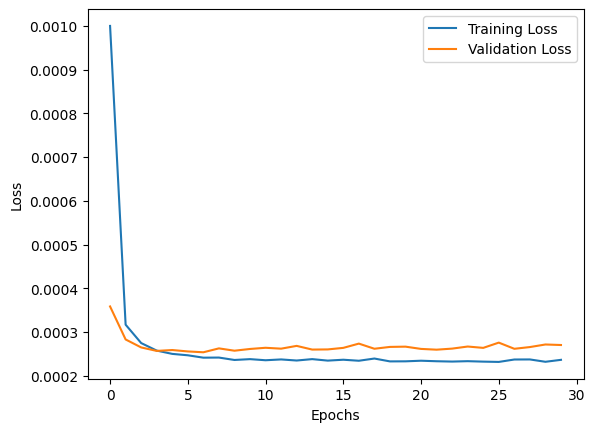

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals


# Prepare the data for RNN
sequence_length = 70  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20766)

# Reshape the data for RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
